In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
employed_num=pd.read_csv("data/new/Employed_Seoul.csv",encoding="utf-8")
employed_num.head()

,Date,Number of employed(Seoul)
0,2015-01,516.65
1,2015-02,514.28
2,2015-03,513.08
3,2015-04,513.92
4,2015-05,520.00


In [3]:
employed_num.shape

(112, 2)

In [4]:
employed_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       112 non-null    object 
 1   Number of employed(Seoul)  112 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [5]:
employed_num.describe()

,Number of employed(Seoul)
count,112.000000
mean,511.760714
std,6.642843
min,489.250000
25%,508.125000
50%,512.680000
75%,516.462500
max,525.210000


In [6]:
employed_num.dtypes

Date                          object
Number of employed(Seoul)    float64
dtype: object

In [7]:
#날짜 형식 변경
employed_num['Date'] = pd.to_datetime(employed_num['Date'])

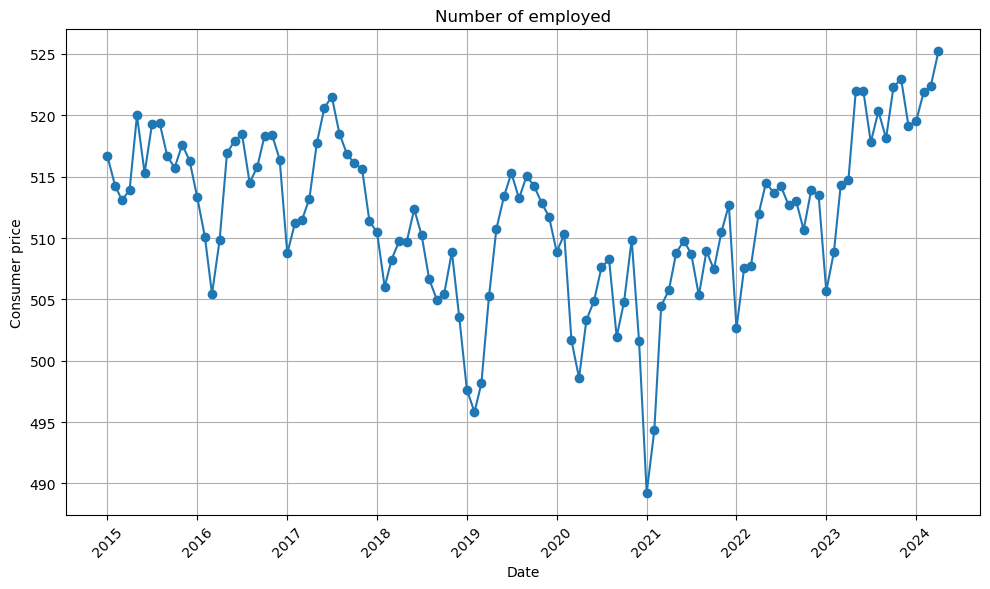

In [8]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(employed_num['Date'],employed_num['Number of employed(Seoul)'], marker='o', linestyle='-')

# 그래프 제목 및 축 레이블
plt.title('Number of employed')
plt.xlabel('Date')
plt.ylabel('Consumer price')

# x 축 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
employed_num.set_index('Date', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
employed_num = employed_num.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
employed_num.reset_index(inplace=True)
employed_num['Date'] = employed_num['Date'].dt.strftime('%Y-%m-%d')

# 결과 출력
employed_num

,Date,Number of employed(Seoul)
0,2015-01-01,516.65
1,2015-01-02,516.65
2,2015-01-03,516.65
3,2015-01-04,516.65
4,2015-01-05,516.65
...,...,...
3374,2024-03-28,522.41
3375,2024-03-29,522.41
3376,2024-03-30,522.41
3377,2024-03-31,522.41


In [11]:
employed_num.to_csv('Employed_num_cleaned.csv',index=False)